In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [5]:
def convert_e2(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2):

    if p1 == 'e':
        p1_vals = p1_vals**2
        fid_p1 = fid_p1**2
        p1_lbl = 'e^2'
    else:
        p2_vals = p2_vals**2
        fid_p2 = fid_p2**2
        p2_lbl = 'e^2'

    return p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2

def convert_sym_mass_ratio(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2):

    if p1 == 'q':
        p1_vals = p1_vals/(1+p1_vals)**2
        fid_p1 = fid_p1/(1+fid_p1)**2
        p1_lbl = 'sym mass ratio'
    else:
        p2_vals = p2_vals/(1+p2_vals)**2
        fid_p2 = fid_p2/(1+fid_p2)**2
        p2_lbl = 'sym mass ratio'

    return p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2

def convert_chi_eff(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2, fid_q):

    if p1 == 'chi1':
        if p2 == 'q':
            q = p2_vals
        else:
            q = fid_q
        p1_vals = p1_vals/(1+1/q)
        fid_p1 = fid_p1/(1+1/fid_q)
        p1_lbl = 'chi_eff'
    else:
        if p1 == 'q':
            q = p1_vals
        else:
            q = fid_q
        p2_vals = p2_vals/(1+1/q)
        fid_p2 = fid_p2/(1+1/fid_q)
        p2_lbl = 'chi_eff'

    return p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2

# Base parameters

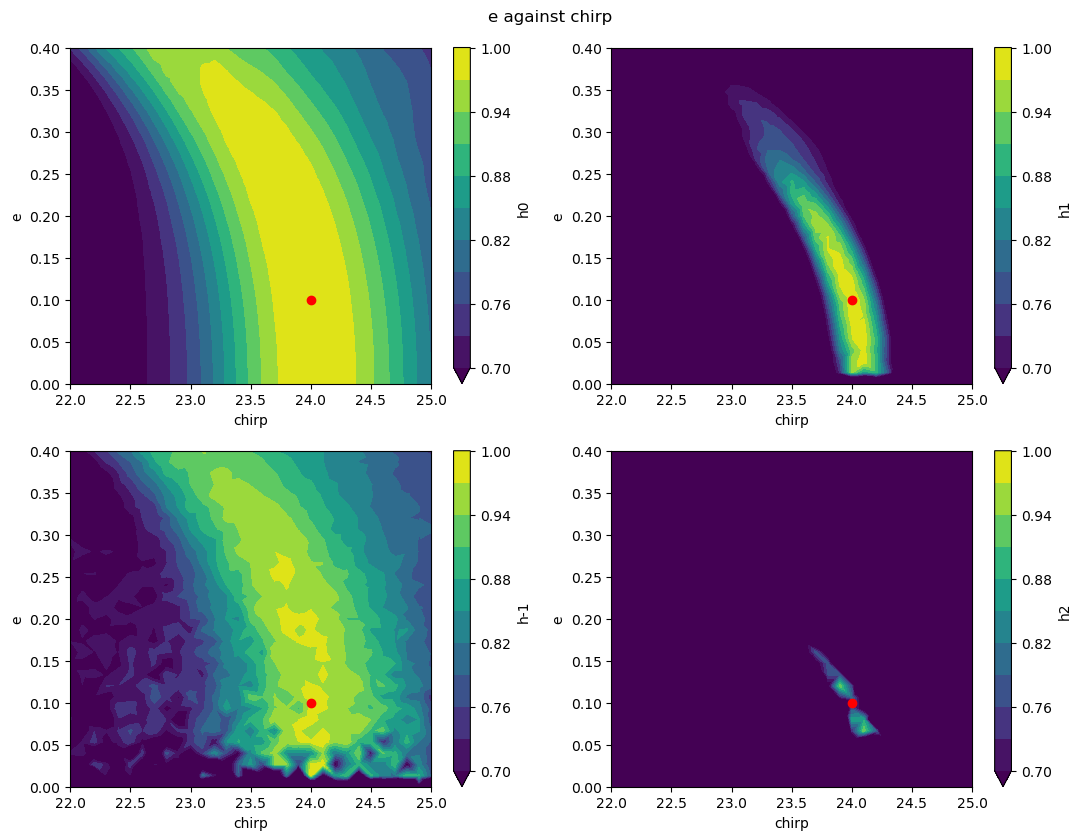

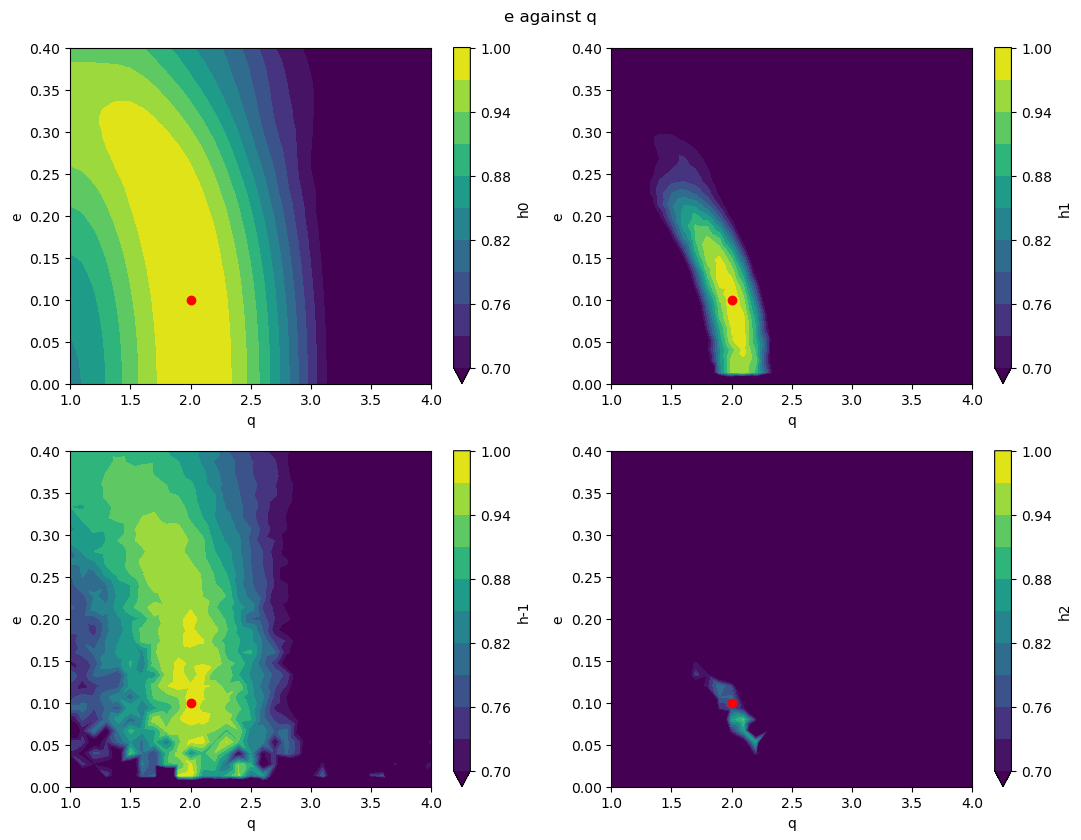

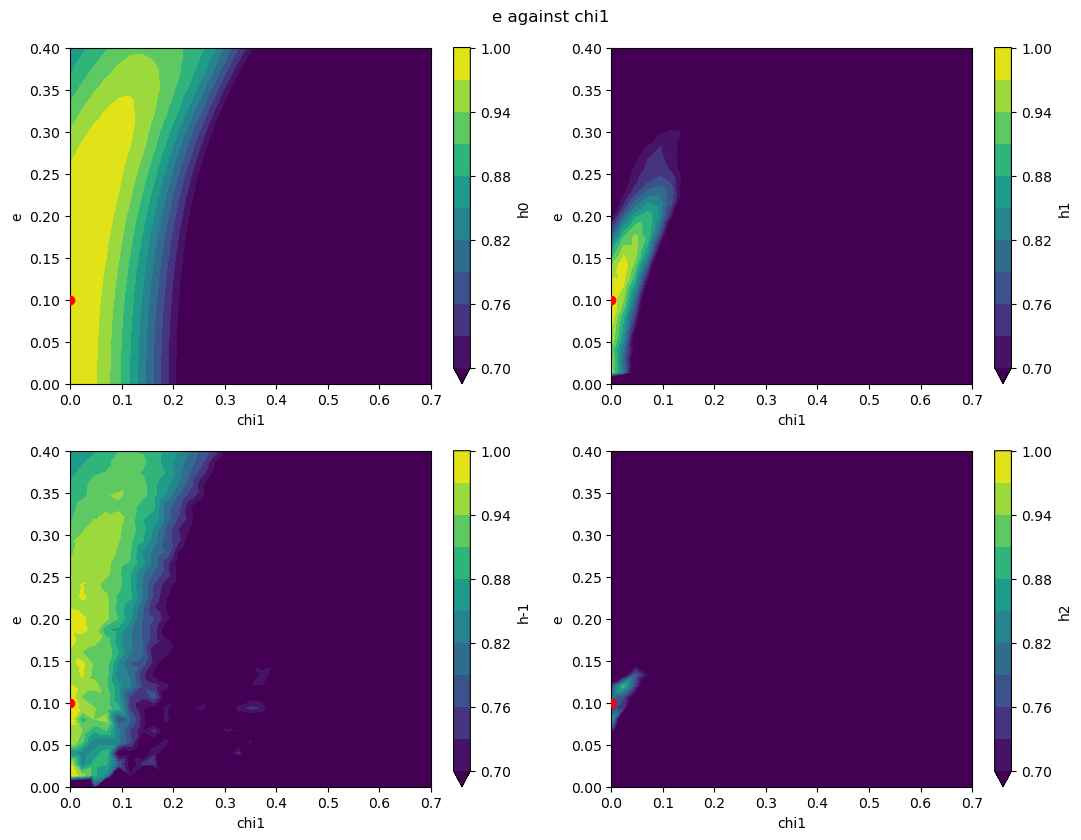

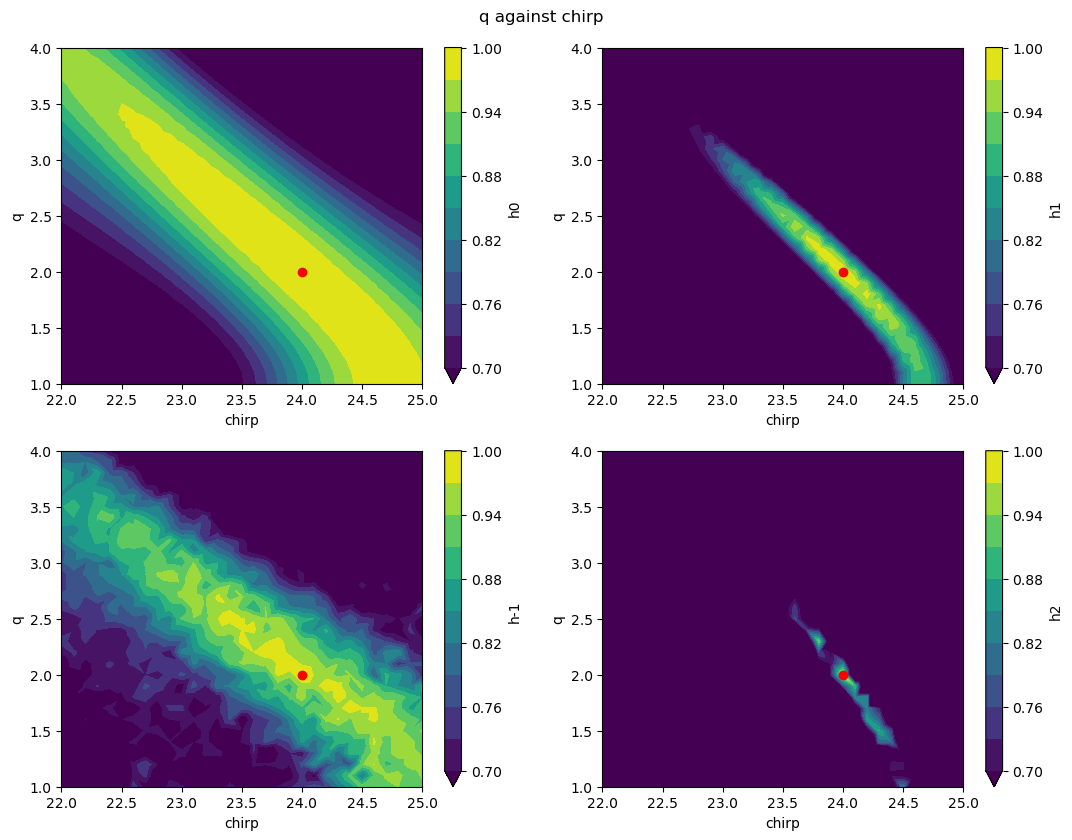

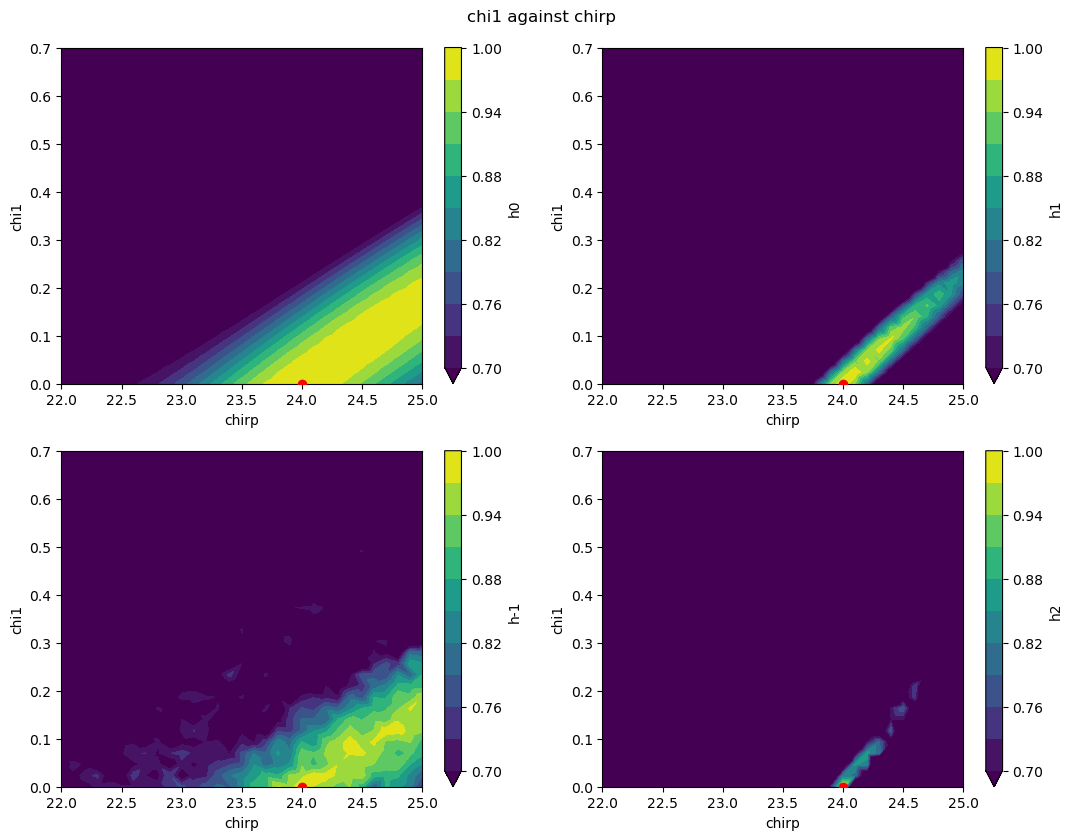

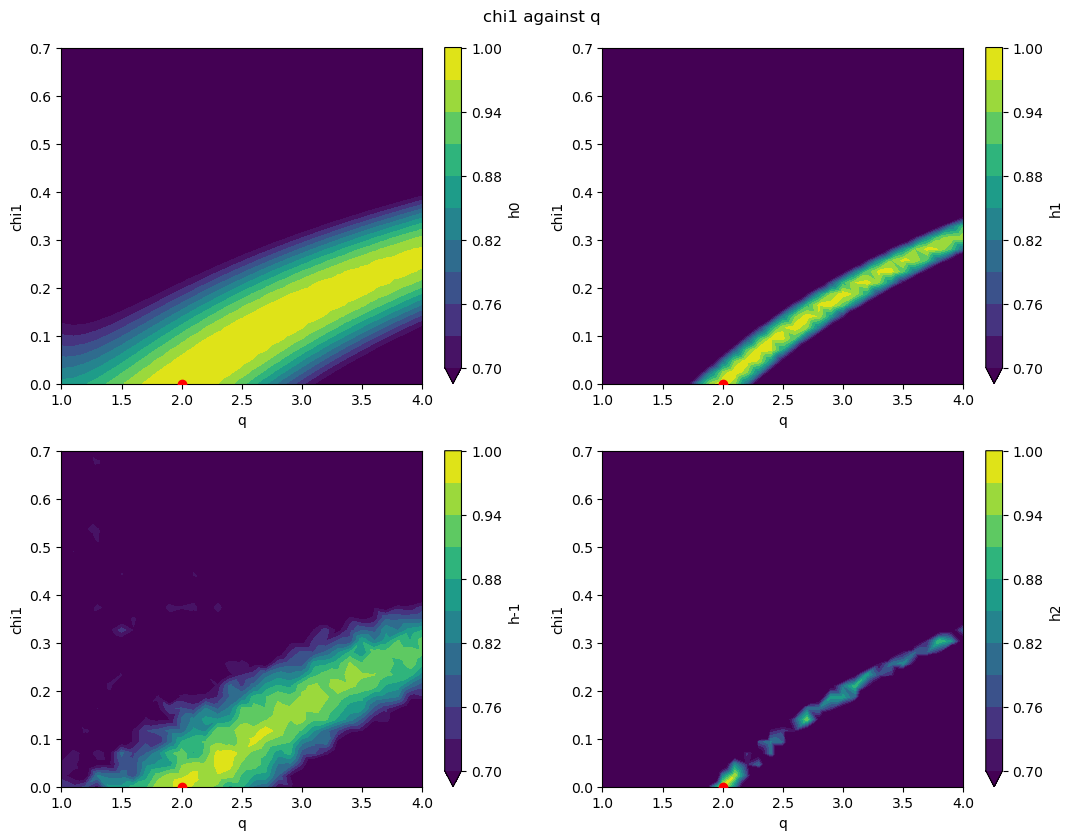

In [3]:
# Parameter conversions
use_e2 = False
use_sym_mass_ratio = False
use_chi_eff = False

# Load data
with open(os.path.join('six_slices_data', 'dataslot_0', 'all_matches'), 'rb') as fp:
    data = pickle.load(fp)

# Loop over each slice
keys = ['h0', 'h1', 'h-1', 'h2']
flip_xy = [True, True, True, False, False, False]
slice_keys = [key for key in data.keys() if ',' in key]
for i, slice_key in enumerate(slice_keys):

    # Unpack parameters for x and y axes
    slice_params = slice_key.split(',')
    if flip_xy[i]:
        slice_params.reverse()
    p1, p2 = slice_params
    p1_vals, p2_vals = np.meshgrid(data['input_params'][f'{p1}_vals'], data['input_params'][f'{p2}_vals'])
    p1_vals, p2_vals = p1_vals.flatten(), p2_vals.flatten()
    p1_lbl, p2_lbl = p1, p2
    fid_p1, fid_p2 = data['input_params'][f'fid_{p1}'], data['input_params'][f'fid_{p2}']

    # Parameter conversions
    if use_e2 and 'e' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_e2(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_sym_mass_ratio and 'q' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_sym_mass_ratio(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_chi_eff and 'chi1' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_chi_eff(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2, data['input_params']['fid_q'])

    # Loop over each subplot
    plt.figure(figsize=(6.4*2,4.8*2))
    for j in range(4):
        key = keys[j]
        if flip_xy[i]:
            contour_data = data[slice_key][key].flatten()
        else:
            contour_data = np.array(data[slice_key][key]).T.flatten()

        # Plot grid
        plt.subplot(2, 2, j+1)
        plt.tricontourf(p1_vals, p2_vals, contour_data, np.linspace(0.7, 1, 11), vmax=1, vmin=0.7, extend='min')
        plt.colorbar(label=key)
        plt.scatter(fid_p1, fid_p2, c='r', zorder=5)
        plt.xlabel(p1_lbl)
        plt.ylabel(p2_lbl)

    # Show each slice
    plt.suptitle(f'{p2_lbl} against {p1_lbl}', y=0.92)
    plt.show()

# Converted parameters

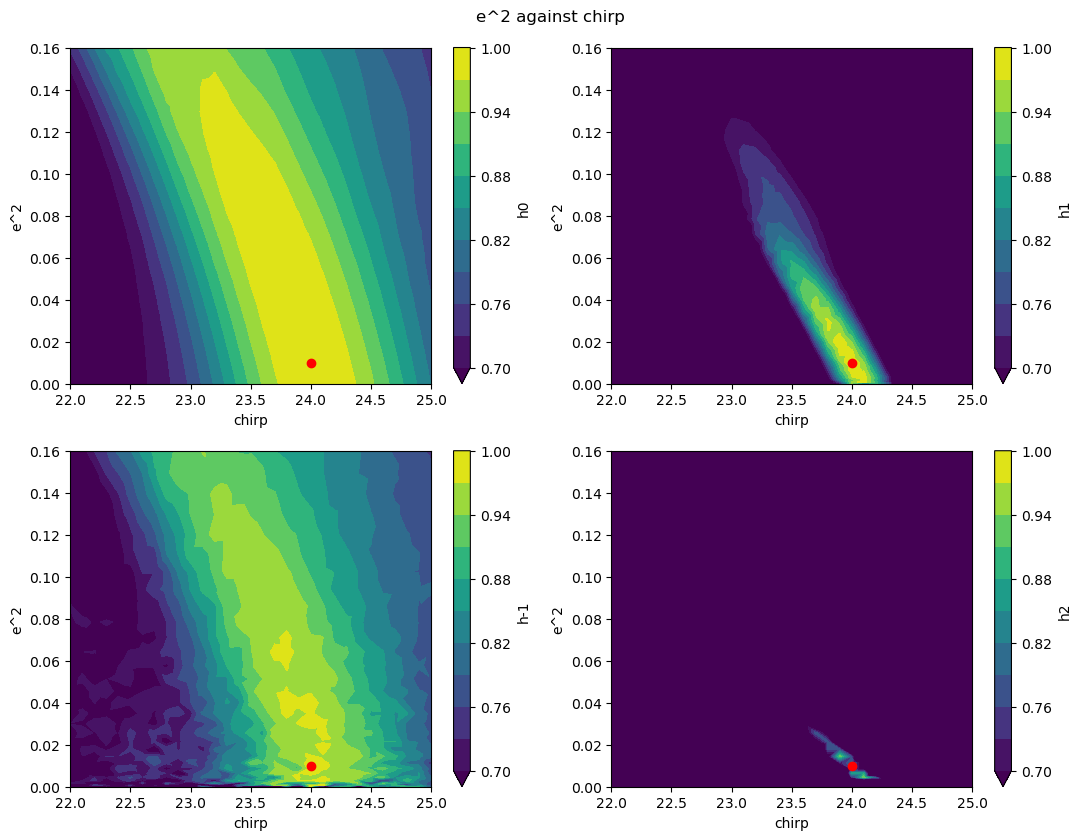

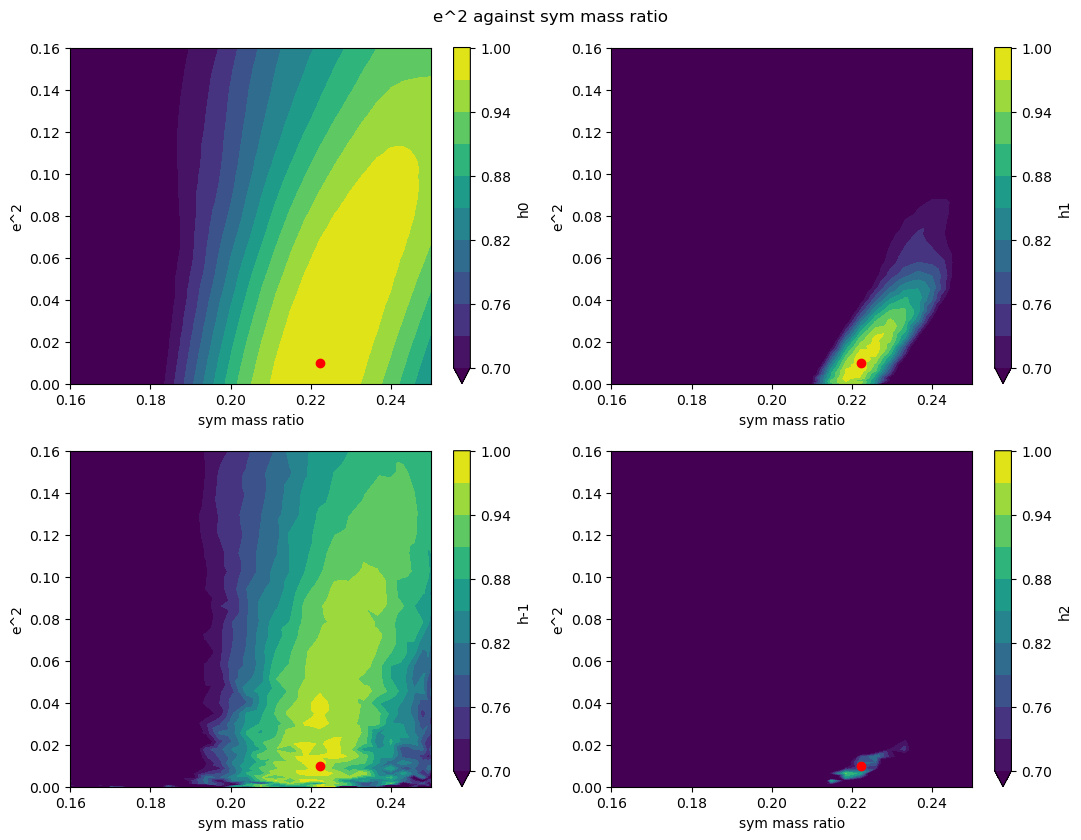

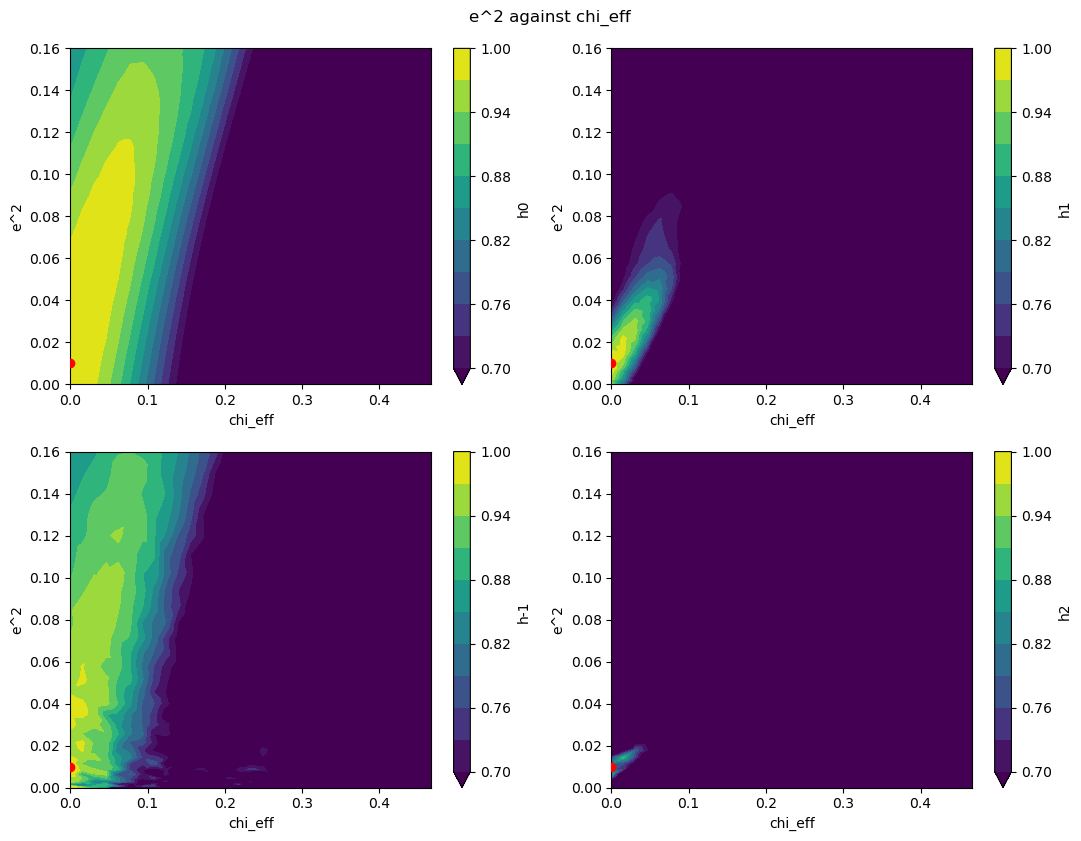

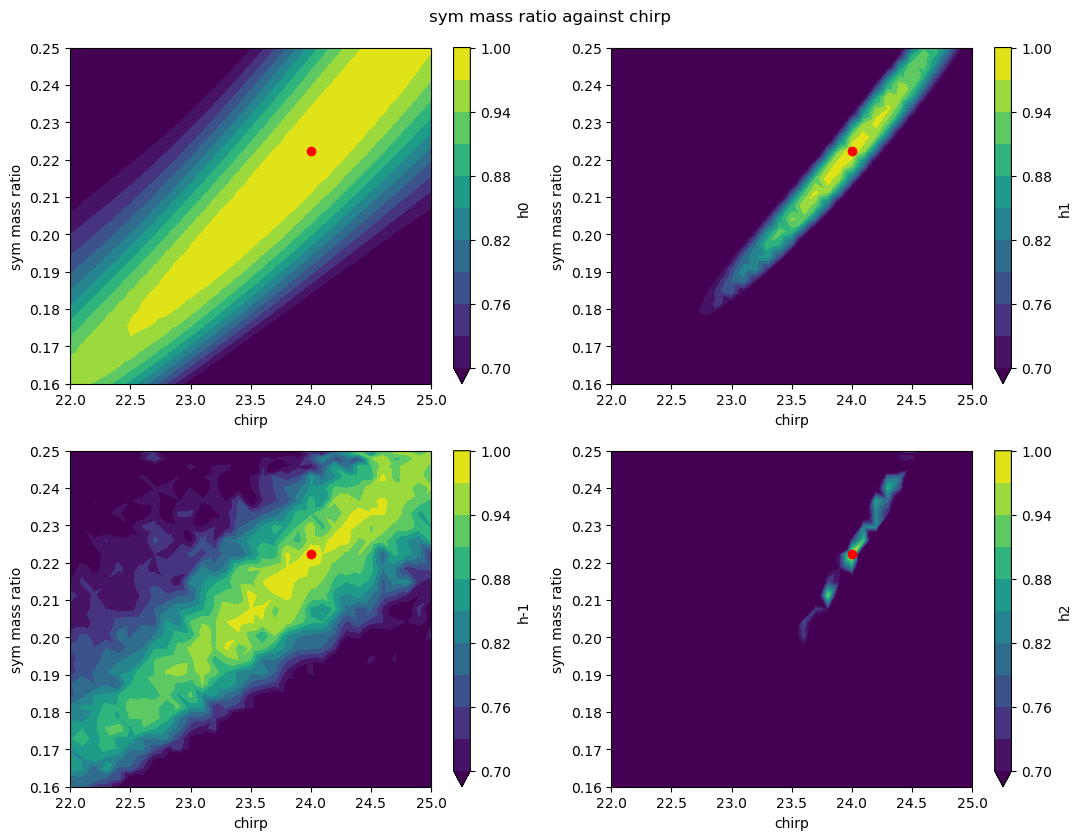

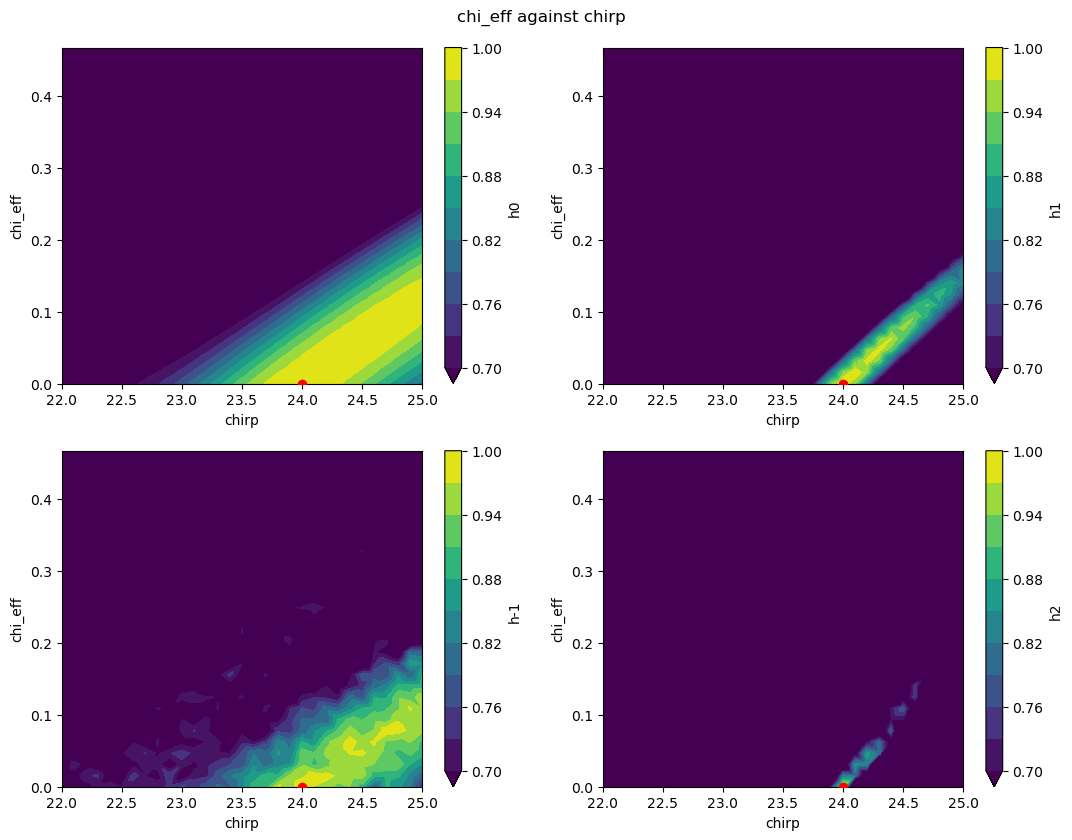

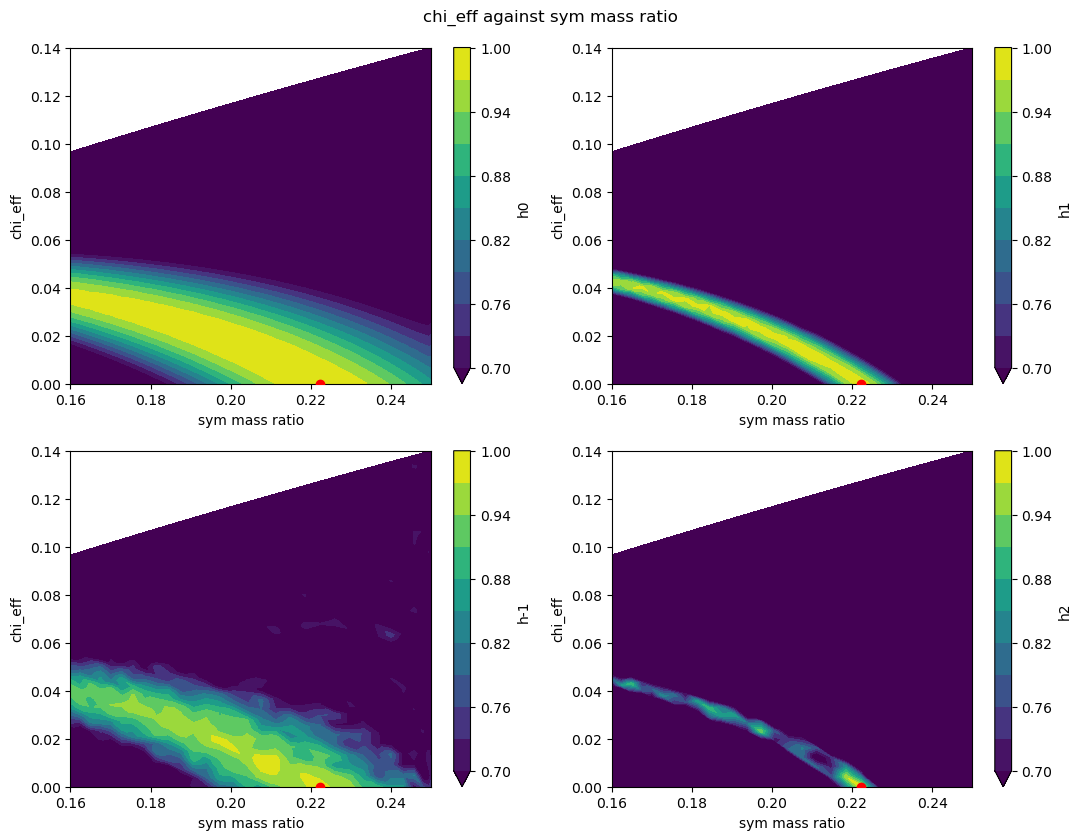

In [6]:
# Parameter conversions
use_e2 = True
use_sym_mass_ratio = True
use_chi_eff = True

# Load data
with open(os.path.join('six_slices_data', 'dataslot_0', 'all_matches'), 'rb') as fp:
    data = pickle.load(fp)

# Loop over each slice
keys = ['h0', 'h1', 'h-1', 'h2']
flip_xy = [True, True, True, False, False, False]
slice_keys = [key for key in data.keys() if ',' in key]
for i, slice_key in enumerate(slice_keys):

    # Unpack parameters for x and y axes
    slice_params = slice_key.split(',')
    if flip_xy[i]:
        slice_params.reverse()
    p1, p2 = slice_params
    p1_vals, p2_vals = np.meshgrid(data['input_params'][f'{p1}_vals'], data['input_params'][f'{p2}_vals'])
    p1_vals, p2_vals = p1_vals.flatten(), p2_vals.flatten()
    p1_lbl, p2_lbl = p1, p2
    fid_p1, fid_p2 = data['input_params'][f'fid_{p1}'], data['input_params'][f'fid_{p2}']

    # Parameter conversions
    if use_e2 and 'e' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_e2(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_sym_mass_ratio and 'q' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_sym_mass_ratio(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_chi_eff and 'chi1' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_chi_eff(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2, data['input_params']['fid_q'])

    # Loop over each subplot
    plt.figure(figsize=(6.4*2,4.8*2))
    for j in range(4):
        key = keys[j]
        if flip_xy[i]:
            contour_data = data[slice_key][key].flatten()
        else:
            contour_data = np.array(data[slice_key][key]).T.flatten()

        # Plot grid
        plt.subplot(2, 2, j+1)
        plt.tricontourf(p1_vals, p2_vals, contour_data, np.linspace(0.7, 1, 11), vmax=1, vmin=0.7, extend='min')
        plt.colorbar(label=key)
        plt.scatter(fid_p1, fid_p2, c='r', zorder=5)
        plt.xlabel(p1_lbl)
        plt.ylabel(p2_lbl)

    # Show each slice
    plt.suptitle(f'{p2_lbl} against {p1_lbl}', y=0.92)
    plt.show()